In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df=pd.read_csv('../dataset/bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [66]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [67]:
df.shape

(13320, 9)

In [68]:
for column in df.columns:
    print(df[column].value_counts())
    print("--"*20)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
----------------------------------------
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
----------------------------------------
location
Whitefield                 540
Sarjapur  Road             399
Electronic City            302
Kanakpura Road             273
Thanisandra                234
                          ... 
Park View Layout             1
Xavier Layout                1
Air View Colony              1
akshaya nagar t c palya      1
mvj engineering college      1
Name: count, Length: 1305, dtype: int64
----------------------------------------
size
2 BHK         5199
3 BHK  

In [69]:
df.drop(['area_type', 'society', 'balcony', 'availability'], axis=1, inplace=True)

In [70]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [72]:
df.location.value_counts()

location
Whitefield                 540
Sarjapur  Road             399
Electronic City            302
Kanakpura Road             273
Thanisandra                234
                          ... 
Park View Layout             1
Xavier Layout                1
Air View Colony              1
akshaya nagar t c palya      1
mvj engineering college      1
Name: count, Length: 1305, dtype: int64

In [73]:
df['location']=df['location'].fillna('Sarjapur Road')

In [74]:
df['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
27 BHK           1
19 BHK           1
43 Bedroom       1
16 BHK           1
14 BHK           1
12 Bedroom       1
13 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [75]:
df['size']=df['size'].fillna('2 BHK')

In [76]:
df['bath']=df['bath'].fillna(df['bath'].median())

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [78]:
df['bhk']=df['size'].str.split().str.get(0).astype(int)

In [79]:
sorted((df.bhk).unique())

[np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(16),
 np.int64(18),
 np.int64(19),
 np.int64(27),
 np.int64(43)]

In [80]:
df[df.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [81]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2117,), dtype=object)

In [82]:
def convertRange(x):
    temp=x.split('-')
    if len(temp)==2:
        return (float(temp[0])+float(temp[1]))/2
    else:
        try:
            return float(x)
        except:
            return None
df['total_sqft']=df['total_sqft'].apply(convertRange)

In [83]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [84]:
df['price_per_sqft']=df['price']*100000/df['total_sqft']

In [85]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [86]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [87]:
df['location'].value_counts()

location
Whitefield           540
Sarjapur  Road       399
Electronic City      302
Kanakpura Road       273
Thanisandra          234
                    ... 
Sabari Nagar           1
Ashraya Layout         1
Shauhardha Layout      1
Kudlu Village,         1
Chikkanahalli          1
Name: count, Length: 1306, dtype: int64

In [88]:
df['location']=df['location'].apply(lambda x: x.strip())
location_count=df['location'].value_counts()

In [89]:
location_count_less_10=location_count[location_count<=10]
location_count_less_10

location
Sector 1 HSR Layout         10
Nagadevanahalli             10
Dairy Circle                10
1st Block Koramangala       10
Naganathapura               10
                            ..
Prasanti Nagar               1
Banasawadi,                  1
Sunkan palya                 1
Gayathri Nagar               1
Old Mangammanapalya Road     1
Name: count, Length: 1054, dtype: int64

In [90]:
df['location']=df['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)

In [91]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [92]:
(df['total_sqft']/df['bhk']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [93]:
df=df[((df['total_sqft'])/df['bhk']>=300)]
df.describe()


,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [94]:
df.shape

(12530, 7)

In [95]:
df.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [96]:
def remove_outliers_sqft(df):
    df_output=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        gen_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_output=pd.concat([df_output,gen_df],ignore_index=True)
    return df_output
df=remove_outliers_sqft(df)
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,1508.440608,2.471702,91.286372,2.574896,5659.062876
std,880.694214,0.979449,86.342786,0.897649,2265.774749
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4244.897959
50%,1286.000000,2.000000,67.000000,2.000000,5175.600739
75%,1650.000000,3.000000,100.000000,3.000000,6428.571429
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [97]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


In [98]:
df=remove_bhk_outliers(df)

In [99]:
df.shape

(7361, 7)

In [100]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [101]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10292,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10293,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10296,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10297,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [102]:
df.drop(columns=['size','price_per_sqft'],inplace=True)

In [103]:
df.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [104]:
df.bath.unique()


array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

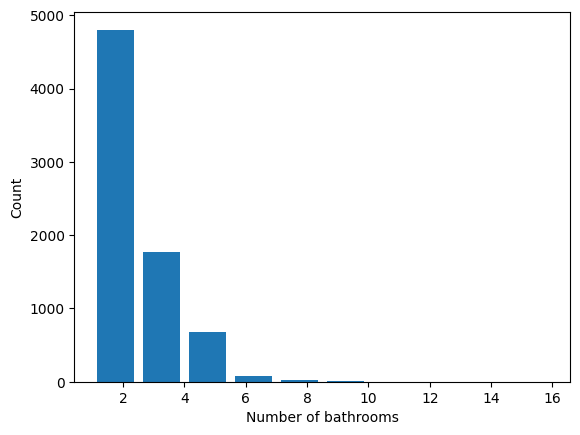

In [105]:
plt.hist(df.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [106]:
# Remove properties where number of bathrooms exceeds BHK by more than 2
# This is based on the assumption that it's unusual to have more than 2 extra bathrooms than bedrooms
threshold = 2
df = df[df['bath'] <= df['bhk'] + threshold]


# Check the statistics again
print(df.describe())

         total_sqft         bath        price          bhk
count   7357.000000  7357.000000  7357.000000  7357.000000
mean    1494.683968     2.445426    98.923257     2.499660
std      855.896831     1.004567    92.678531     0.928321
min      300.000000     1.000000    10.000000     1.000000
25%     1095.000000     2.000000    50.000000     2.000000
50%     1260.000000     2.000000    73.000000     2.000000
75%     1680.000000     3.000000   113.000000     3.000000
max    30000.000000    16.000000  2200.000000    16.000000


In [107]:
df.shape

(7357, 5)

# CLEANED DATA AND MODEL BUILDING

In [108]:
#CLEANED DATA
df.to_csv('../dataset/cleaned_bengaluru_house_prices.csv',index=False)

In [109]:
X=df.drop('price',axis='columns')
y=df.price

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [119]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [120]:
print(X_train.shape)
print(X_test.shape)

(5885, 4)
(1472, 4)


In [121]:
#applying linear regression model
column_trans=make_column_transformer((OneHotEncoder(sparse_output=False),['location']),remainder='passthrough')

In [122]:
scalar=StandardScaler()
lr=LinearRegression()

In [123]:
pipe=make_pipeline(column_trans,scalar,lr)

In [124]:
pipe.fit(X_train,y_train)

,steps,"[('columntransformer', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [125]:
y_pred_lr=pipe.predict(X_test)

In [127]:
r2_score(y_test,y_pred_lr)

0.8683673741259172

In [130]:
#applying lasso regression model
lasso=Lasso()
pipe=make_pipeline(column_trans,scalar,lasso)
pipe.fit(X_train,y_train)

,steps,"[('columntransformer', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [131]:
y_pred_lasso=pipe.predict(X_test)
r2_score(y_test,y_pred_lasso)

0.8471250373713891

In [132]:
#applying ridge regression model
ridge=Ridge()
pipe=make_pipeline(column_trans,scalar,ridge)
pipe.fit(X_train,y_train)
y_pred_ridge=pipe.predict(X_test)
r2_score(y_test,y_pred_ridge)

0.8683731937044282

In [139]:
print(f"{'Model Type':<25} {'R² Score':<20}")
print("-" * 45)
print(f"{'No Regularization':<25} {0.8683673741259172:<20}")
print(f"{'Ridge Regularization':<25} {0.8683731937044282:<20}")
print(f"{'Lasso Regularization':<25} {0.8471250373713891:<20}")

Model Type                R² Score            
---------------------------------------------
No Regularization         0.8683673741259172  
Ridge Regularization      0.8683731937044282  
Lasso Regularization      0.8471250373713891  
